#Part A- ARCH/GARCH Model

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [17]:
#Get the data for Johnson & Johnson (JNJ)
ticker = "JNJ"

#Download the data
data = yf.download(ticker, start="2021-04-03", end="2024-05-25")

[*********************100%%**********************]  1 of 1 completed


In [18]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

In [20]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 18.5 MB/s eta 0:00:00


In [21]:
# Add returns as column to DataFrame
data['Returns'] = returns

In [24]:
# Check for NaN or infinite values
print("Checking for NaN values:")
print(data['Returns'].isna().sum())

print("Checking for infinite values:")
print(np.isinf(data['Returns']).sum())

# Remove or impute NaN/infinite values
data_clean = data[np.isfinite(data['Returns'])]
data['Returns'].fillna(data['Returns'].mean(), inplace=True)

Checking for NaN values:
1
Checking for infinite values:
0


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1127.45
Distribution:                  Normal   AIC:                           2260.91
Method:            Maximum Likelihood   BIC:                           2274.93
                                        No. Observations:                  792
Date:                Fri, Jul 26 2024   Df Residuals:                      791
Time:                        15:33:14   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.4636e-03  3.607e-02  4.058e-02      0.968 

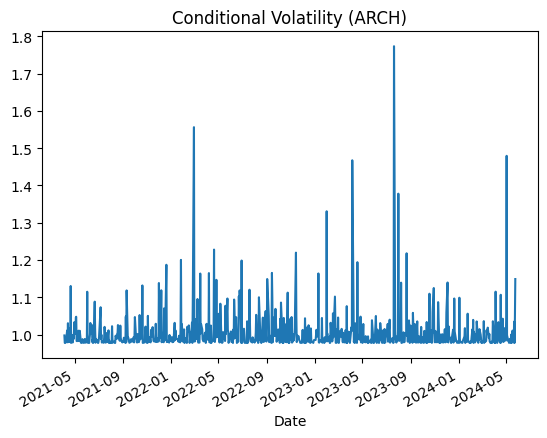

In [25]:
from arch import arch_model
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1124.20
Distribution:                  Normal   AIC:                           2256.40
Method:            Maximum Likelihood   BIC:                           2275.10
                                        No. Observations:                  792
Date:                Fri, Jul 26 2024   Df Residuals:                      791
Time:                        15:33:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.5316e-03  3.441e-02      0.161      0.872 

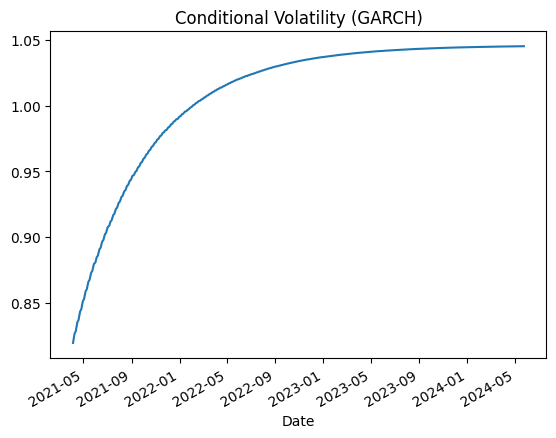

In [26]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [27]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1127.961379785459
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1123.7732837010649
Iteration:     15,   Func. Count:     94,   Neg. LLF: 1123.7593106094762
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1123.7593106117552
            Iterations: 15
            Function evaluations: 94
            Gradient evaluations: 15


In [28]:
forecasts = res.forecast()
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [29]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-05-20,153.100006,153.389999,151.259995,151.270004,151.270004,7742300,-1.388520
2024-05-21,151.779999,152.589996,150.789993,151.240005,151.240005,5492400,-0.019831
2024-05-22,150.839996,154.080002,150.320007,153.500000,153.500000,6609800,1.494310
2024-05-23,152.750000,152.839996,149.380005,149.699997,149.699997,8000400,-2.475572
2024-05-24,149.529999,149.809998,146.759995,146.970001,146.970001,9517000,-1.823644


In [30]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-05-24  0.005259
                 h.1
Date                
2024-05-24  1.090224
                 h.1
Date                
2024-05-24  1.090224


In [31]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04     h.05      h.06  \
Date                                                                    
2024-05-24  1.090224  1.090236  1.090247  1.090259  1.09027  1.090281   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-05-24  1.090292  1.090304  1.090315  1.090326  ...  1.090942  1.090949   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-05-24  1.090956  1.090962  1.090969  1.090975  1.090982  1.090988   

                h.89      h.90  
Date                            
2024-05-24  1.090995  1.091001  

[1 rows x 90 columns]


In [32]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-24,1.090224,1.090236,1.090247,1.090259,1.09027,1.090281,1.090292,1.090304,1.090315,1.090326,...,1.090942,1.090949,1.090956,1.090962,1.090969,1.090975,1.090982,1.090988,1.090995,1.091001


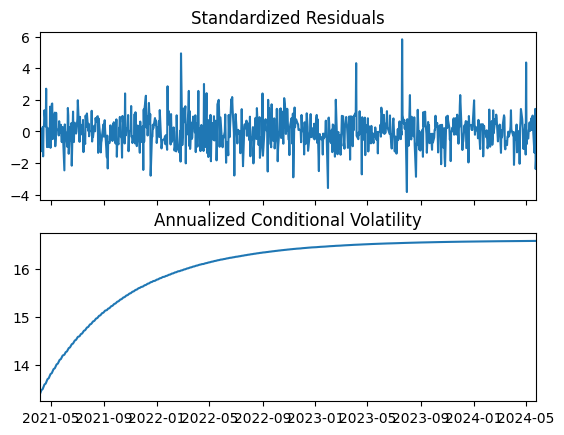

In [33]:
fig = res.plot(annualize="D")

#Part B-VAR, VECM model

In [1]:
!pip install pandas statsmodels matplotlib openpyxl


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# Load the dataset
df = pd.read_excel('/content/pinksheet.xlsx', sheet_name="Monthly Prices", skiprows=6)

# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert the Date column to Date format
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '01', format='%YM%m%d')

# Display the first few rows of the dataframe
print(df.head())


        Date  CRUDE_PETRO  CRUDE_BRENT  CRUDE_DUBAI CRUDE_WTI COAL_AUS  \
0 1960-01-01         1.63         1.63         1.63         …        …   
1 1960-02-01         1.63         1.63         1.63         …        …   
2 1960-03-01         1.63         1.63         1.63         …        …   
3 1960-04-01         1.63         1.63         1.63         …        …   
4 1960-05-01         1.63         1.63         1.63         …        …   

  COAL_SAFRICA  NGAS_US  NGAS_EUR NGAS_JP  ...    ALUMINUM  IRON_ORE  COPPER  \
0            …     0.14  0.404774       …  ...  511.471832     11.42  715.40   
1            …     0.14  0.404774       …  ...  511.471832     11.42  728.19   
2            …     0.14  0.404774       …  ...  511.471832     11.42  684.94   
3            …     0.14  0.404774       …  ...  511.471832     11.42  723.11   
4            …     0.14  0.404774       …  ...  511.471832     11.42  684.75   

    LEAD     Tin  NICKEL   Zinc   GOLD  PLATINUM  SILVER  
0  206.1  2180.

In [7]:
# Select specific columns (Date and selected commodities)
commodity_columns = ['Date', df.columns[2], df.columns[24], df.columns[69], df.columns[71], df.columns[60], df.columns[30]]
commodity = df[commodity_columns]

# Set the Date column as the index
commodity.set_index('Date', inplace=True)

# Display the structure of the dataframe
print(commodity.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 774 entries, 1960-01-01 to 2024-06-01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRUDE_BRENT   774 non-null    float64
 1   SOYBEANS      774 non-null    float64
 2   GOLD          774 non-null    float64
 3   SILVER        774 non-null    float64
 4   UREA_EE_BULK  774 non-null    float64
 5   MAIZE         774 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB
None


In [11]:
# Check for cointegration using Johansen's test
def johansen_test(df, det_order=-1):
    result = coint_johansen(df, det_order, k_ar_diff=1)
    return result

johansen_result = johansen_test(commodity)

# Extract and print eigenvalues and critical values
print('Eigenvalues:', johansen_result.eig)
print('Critical values (90%, 95%, 99%):', johansen_result.cvt)


Eigenvalues: [0.11153609 0.07794329 0.05548785 0.02632748 0.01251461 0.00525239]
Critical values (90%, 95%, 99%): [[79.5329 83.9383 92.7136]
 [56.2839 60.0627 67.6367]
 [37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]


In [9]:
# Estimate the VECM model
vecm_model = VECM(commodity, k_ar_diff=1, coint_rank=1)
vecm_fit = vecm_model.fit()
print(vecm_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation CRUDE_BRENT
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
L1.CRUDE_BRENT      0.3380      0.037      9.224      0.000       0.266       0.410
L1.SOYBEANS         0.0074      0.007      0.981      0.326      -0.007       0.022
L1.GOLD            -0.0020      0.006     -0.325      0.745      -0.014       0.010
L1.SILVER          -0.0633      0.148     -0.428      0.668      -0.353       0.226
L1.UREA_EE_BULK    -0.0134      0.004     -3.162      0.002      -0.022      -0.005
L1.MAIZE            0.0304      0.016      1.871      0.061      -0.001       0.062
Det. terms outside the coint. relation & lagged endog. parameters for equation SOYBEANS
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

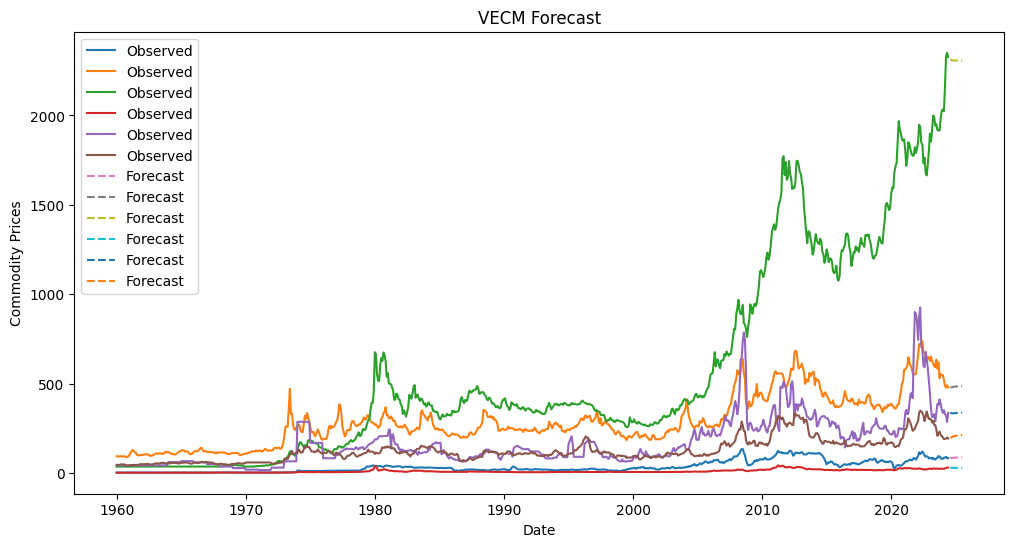

In [12]:
# Forecast using the VECM model
n_forecast = 12
forecast = vecm_fit.predict(steps=n_forecast)

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=commodity.index[-1], periods=n_forecast + 1, freq='M')[1:])

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(commodity.index, commodity, label='Observed')
plt.plot(forecast_df.index, forecast_df, label='Forecast', linestyle='--')
plt.title('VECM Forecast')
plt.xlabel('Date')
plt.ylabel('Commodity Prices')
plt.legend(loc='best')
plt.show()


In [13]:
forecast_df

,0,1,2,3,4,5
2024-07-31,82.355317,477.603702,2313.461423,29.224470,337.486351,195.657488
2024-08-31,82.840652,478.718366,2309.529800,28.830494,334.006305,199.184203
2024-09-30,83.554747,480.202839,2308.552187,28.493495,332.977117,201.994618
2024-10-31,84.215158,481.450856,2308.138798,28.215617,333.354264,204.207136
2024-11-30,84.759625,482.443774,2307.774591,27.987465,334.056458,205.987431
2024-12-31,85.199104,483.240373,2307.431458,27.800631,334.705540,207.435155
2025-01-31,85.554598,483.885837,2307.133081,27.648056,335.237319,208.614785
2025-02-28,85.843249,484.410836,2306.885349,27.523694,335.666100,209.575504
2025-03-31,86.078032,484.838151,2306.683007,27.422431,336.013296,210.357497
2025-04-30,86.269086,485.185923,2306.518363,27.340011,336.295486,210.993853
